# 일조량에 따른 토마토 생산량과 가격 예측

- 토마토마(김준회, 연제호, 정다영, 추영은)
- 발표일 : 2020년 3월 19일

# 1. 서론

### 1) 분석 배경

최근 몇년간 미세먼지에 대한 관심이 높아졌다. 미세먼지는 황사처럼 하늘을 부옇게 만들고 먼거리까지 이동한다는 점에서 매우 비슷하나 주로 봄에 영향을 주는 황사와 달리 일년 내내 영향을 주며 발생 과정과 특성 역시 많은 차이가 있다. 미세먼지는 가정의 난방과 취사, 자동차 운행, 공장에서의 화석연료의 사용, 산불 및 화전 경작 등으로 발생한 인위적인 입자로 크기는 황사보다 훨씬 작은 2㎛ 이하이다. 지름 10㎛(마이크로미터) 이하의 먼지는 체내에 흡수되어 다양한 질병의 원인이 된다는 내용이 널리 알려져 마스크가 생활화되었다. 

미세먼지는 인체 뿐만 아니라 농가에도 피해를 주고 있다. 비닐하우스에서 재배하는 식물의 경우 농가에서 비닐하우스 위에 내려앉은 미세먼지를 자주 걷어내기 어렵고 유리온실도 마찬가지로 미세먼지으로 인한 투광량이 떨어져 작물의 상품성과 생산성이 떨어진다는 것이다. 특히, 토마토의 경우 노지보다는 하우스 시설에서 재배하고 있고 저장성이 약한데다가 국내 생산 의존도가 높아 어느 농산물 보다 가격 변동이 크다고 한다.

### 2) 분석 목적

미세먼지에 따른 일조량의 변화와 토마토 생산량 및 가격을 예측하고자 한다.

## 2. 데이터 준비

### 1) 활용 데이터

 데이터 | 사용 변수 | 시점 | 출처 | 파일 형식
:---:|:-------:|:---:|:---:|:--------:
토마토 일별 품목별 도.소매가격정보 | 품목명, 품종명,	시군구,	마켓명,	연도,	날짜,	가격 | 일 | [농산물유통정보](https://kdx.kr/kamis/periodProductList) | csv
농작물생산조사:채소생산량(과채류) | 품종명, 시군구, 마켓명, 연도, 날짜, 가격 | 일 | [통계청](http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1ET0027&vw_cd=MT_ZTITLE&list_id=F1H&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE) | csv
종관기상관측(ASOS) | 지점명,	일시,	평균기온,	일강수량,	합계 일조시간 | 일 | [기상청 기상자료개방포털](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36) | csv
대기오염 최종확정자료  | 지역, 측정소코드, 측정소명, 측정일시, SO2, CO, O3, NO2, PM10 | 시간 | [AirKorea](https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123) | xlsx

#### 종관기상관측(ASOS) 변수 설명

 - 평균기온 : 
 - 일강수량 : 
 - 합계 일조시간 : 태양 광선이 구름이나 안개로 가려지지 않고 땅 위를 비치는 것, 실제로 비친 시간

#### 대기오염 최종확정자료

 - SO2 : 아황산가스
 - CO : 이산화탄소
 - O3 : 오존
 - NO2 : 이산화질소
 - PM10 : 미세먼지

## 3. 데이터 가공

#### 필요한 라이브러리 불러오기

In [1]:
import pandas as pd # 데이터 프레임
import numpy as np # 
import re # 정규표현식
import os # wd 변경

import seaborn as sns # 시각화

#### 시각화를 위한 한글 폰트 설정하기

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')

# 마이너스 값 깨지는 현상 해결
plt.rc('axes', unicode_minus=False)

### 1) 토마토 도매 가격 정보 전처리

In [4]:
# 토마토 일별 도.소매 가격정보 2013-2016년 데이터 불러오기 
tom36 = pd.read_csv('/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/20132016토마토_일별 품목별 도.소매가격정보.csv')

# 데이터 하단에 있는 평균과 평년 데이터 제외
tomp36 = tom36[(tom36['시군구']!='평균') & (tom36['시군구']!='평년')]

# 데이터 확인
tomp36.head()

,품목명,품종명,시군구,마켓명,연도,날짜,가격
0,토마토,토마토(10kg),서울,가락도매,2013,01/02,"29,000"
1,토마토,토마토(10kg),서울,가락도매,2013,01/03,"30,000"
2,토마토,토마토(10kg),서울,가락도매,2013,01/04,"30,000"
3,토마토,토마토(10kg),서울,가락도매,2013,01/07,"30,000"
4,토마토,토마토(10kg),서울,가락도매,2013,01/08,"27,000"


In [5]:
# 토마토 일별 도.소매 가격정보 2017-2019년 데이터 불러오기 
tom79 = pd.read_csv('/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/20172019토마토_일별 품목별 도.소매가격정보.csv')

# 13-16년 데이터와 마찬가지로 평균 평년 데이터 제외. 2020년 데이터도 제외.
tomp79 = tom79[(tom79['시군구']!='평균') & (tom79['시군구']!='평년') & (tom79['연도']!= 2020)]

# 데이터 확인
tomp79.head()

,품목명,품종명,시군구,마켓명,연도,날짜,가격
0,토마토,토마토(10kg),서울,가락도매,2017,01/02,"43,000"
1,토마토,토마토(10kg),서울,가락도매,2017,01/03,"41,000"
2,토마토,토마토(10kg),서울,가락도매,2017,01/04,"40,000"
3,토마토,토마토(10kg),서울,가락도매,2017,01/05,"38,000"
4,토마토,토마토(10kg),서울,가락도매,2017,01/06,"38,000"


In [6]:
# 데이터 합치기
tomp = pd.concat([tomp36,tomp79])

# 제대로 합쳐졌는지 행 개수 확인
tomp.shape

(9323, 7)

In [7]:
# 품목명이 모두 토마토이고, 품종명 또한 토마토(10kg)으로 같은 정보를 담고 있으므로 품목명 컬럼을 삭제
tomp = tomp.drop('품목명', axis = 1)

# 데이터 확인
tomp.head()

,품종명,시군구,마켓명,연도,날짜,가격
0,토마토(10kg),서울,가락도매,2013,01/02,"29,000"
1,토마토(10kg),서울,가락도매,2013,01/03,"30,000"
2,토마토(10kg),서울,가락도매,2013,01/04,"30,000"
3,토마토(10kg),서울,가락도매,2013,01/07,"30,000"
4,토마토(10kg),서울,가락도매,2013,01/08,"27,000"


In [8]:
#시군구, 마켓명, 연도, 날짜 오름차순으로 정렬
tomp = tomp.sort_values(by = ['시군구','마켓명', '연도', '날짜'])

# 데이터 확인
tomp.head()

,품종명,시군구,마켓명,연도,날짜,가격
2955,토마토(10kg),광주,각화도매,2013,01/02,"28,000"
2956,토마토(10kg),광주,각화도매,2013,01/03,"28,000"
2957,토마토(10kg),광주,각화도매,2013,01/04,"28,000"
2958,토마토(10kg),광주,각화도매,2013,01/07,"28,000"
2959,토마토(10kg),광주,각화도매,2013,01/08,"28,000"


In [22]:
# 날짜 컬럼에서 슬래시 '/' 삭제
tomp['날짜'] = tomp['날짜'].str.replace('/','-')

# 데이터 확인
tomp.head()

,품종명,시군구,마켓명,연도,날짜,가격
2955,토마토(10kg),광주,각화도매,2013,01-02,"28,000"
2956,토마토(10kg),광주,각화도매,2013,01-03,"28,000"
2957,토마토(10kg),광주,각화도매,2013,01-04,"28,000"
2958,토마토(10kg),광주,각화도매,2013,01-07,"28,000"
2959,토마토(10kg),광주,각화도매,2013,01-08,"28,000"


In [ ]:
# 2013-2019 토마토 도소매 가격 데이터 csv파일로 저장
tomp.to_csv('토마토 도소매 가격 데이터 2013-2019.csv', index = False, encoding = 'CP949')

In [ ]:
# 파일 불러와 확인하기
pd.read_csv('토마토 도소매 가격 데이터 2013-2019.csv', encoding = 'CP949')

### 2) 농작물생산조사:채소생산량(과채류)	

In [4]:
# 토마토 생산량 파일 불러오기
to = pd.read_csv('/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/채소생산량_과채류__20200304201937.csv', 
                 encoding='euc-kr')

In [5]:
# 토마토 생산량 파일 확인
to.head()

,시도별,2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2014,...,2017.6,2017.7,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7
0,시도별,토마토:면적 (ha),생산량 (톤),노지토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤),시설토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤),토마토:면적 (ha),...,10a당 생산량 (kg),생산량 (톤),토마토:면적 (ha),생산량 (톤),노지토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤),시설토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤)
1,계,6054,388624,0,0,0,6054,6419,388624,7070,...,6142,355107,6058,388657,0,0,0,6058,6415,388657
2,서울특별시,2,137,0,0,0,2,6850,137,1,...,1433,34,4,18,0,0,0,4,450,18
3,부산광역시,355,22056,0,0,0,355,6213,22056,423,...,6081,19196,363,25248,0,0,0,363,6952,25248
4,대구광역시,98,7933,0,0,0,98,8095,7933,71,...,5174,10201,167,11372,0,0,0,167,6800,11372


In [6]:
# 컬럼명의 .1, .2 ...을 수정하기 위해 컬럼명을 리스트에 담기
to_cols = to.columns.to_list()

# for문을 통해 연도의 4글자만 가져오기
for i in range(len(to_cols)):
    if len(to_cols[i]) > 4:
        to_cols[i] = to_cols[i][:4]

In [7]:
# 수정한 연도를 컬럼으로 지정하기
to.columns = to_cols

# 수정한 컬럼명 확인하기
to.head(2)

,시도별,2013,2013,2013,2013,2013,2013,2013,2013,2014,...,2017,2017,2018,2018,2018,2018,2018,2018,2018,2018
0,시도별,토마토:면적 (ha),생산량 (톤),노지토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤),시설토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤),토마토:면적 (ha),...,10a당 생산량 (kg),생산량 (톤),토마토:면적 (ha),생산량 (톤),노지토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤),시설토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤)
1,계,6054,388624,0,0,0,6054,6419,388624,7070,...,6142,355107,6058,388657,0,0,0,6058,6415,388657


In [8]:
# 컬럼을 리스트에 담기
to_cols = to.columns.to_list()

# 첫 번째 행을 to_row에 담기
to_row = to.iloc[0]

# melt를 사용하기 위해 컬럼명 사이에 공백 넣기
to_cols = [f'{i} ' for i in to_cols]
tom = to_cols + to_row

# 리스트 확인하기
tom.head()

시도별                시도별 시도별
2013      2013 토마토:면적 (ha)
2013          2013 생산량 (톤)
2013    2013 노지토마토:면적 (ha)
2013    2013 10a당 생산량 (kg)
Name: 0, dtype: object

In [9]:
# 첫 번째 인덱스명을 '연도'로 수정하기
tom[0] = "연도"

# 첫 번째 컬럼명을 '연도'로 수정하기
to.columns = tom

# 수정한 컬럼명 확인하기
to.head(2)

,연도,2013 토마토:면적 (ha),2013 생산량 (톤),2013 노지토마토:면적 (ha),2013 10a당 생산량 (kg),2013 생산량 (톤),2013 시설토마토:면적 (ha),2013 10a당 생산량 (kg),2013 생산량 (톤),2014 토마토:면적 (ha),...,2017 10a당 생산량 (kg),2017 생산량 (톤),2018 토마토:면적 (ha),2018 생산량 (톤),2018 노지토마토:면적 (ha),2018 10a당 생산량 (kg),2018 생산량 (톤),2018 시설토마토:면적 (ha),2018 10a당 생산량 (kg),2018 생산량 (톤)
0,시도별,토마토:면적 (ha),생산량 (톤),노지토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤),시설토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤),토마토:면적 (ha),...,10a당 생산량 (kg),생산량 (톤),토마토:면적 (ha),생산량 (톤),노지토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤),시설토마토:면적 (ha),10a당 생산량 (kg),생산량 (톤)
1,계,6054,388624,0,0,0,6054,6419,388624,7070,...,6142,355107,6058,388657,0,0,0,6058,6415,388657


In [10]:
# 사용하지 않는 0, 1 행 삭제하기
to = to.drop(labels=[0,1],axis=0)

# 인덱스 리셋하기
to.reset_index(drop=True)

# 수정한 인덱스 확인
to.head()

,연도,2013 토마토:면적 (ha),2013 생산량 (톤),2013 노지토마토:면적 (ha),2013 10a당 생산량 (kg),2013 생산량 (톤),2013 시설토마토:면적 (ha),2013 10a당 생산량 (kg),2013 생산량 (톤),2014 토마토:면적 (ha),...,2017 10a당 생산량 (kg),2017 생산량 (톤),2018 토마토:면적 (ha),2018 생산량 (톤),2018 노지토마토:면적 (ha),2018 10a당 생산량 (kg),2018 생산량 (톤),2018 시설토마토:면적 (ha),2018 10a당 생산량 (kg),2018 생산량 (톤)
2,서울특별시,2,137,0,0,0,2,6850,137,1,...,1433,34,4,18,0,0,0,4,450,18
3,부산광역시,355,22056,0,0,0,355,6213,22056,423,...,6081,19196,363,25248,0,0,0,363,6952,25248
4,대구광역시,98,7933,0,0,0,98,8095,7933,71,...,5174,10201,167,11372,0,0,0,167,6800,11372
5,인천광역시,111,5130,0,0,0,111,4622,5130,120,...,7023,3887,54,3491,0,0,0,54,6515,3491
6,광주광역시,260,5613,0,0,0,260,2159,5613,216,...,7679,9751,123,11753,0,0,0,123,9538,11753


In [11]:
# 롱 포맷으로 변경하기 위해 melt 함수 사용하기
tos = pd.melt(to, id_vars='연도')

# 롱 포맷으로 변경된 데이터 확인
tos.head()

,연도,0,value
0,서울특별시,2013 토마토:면적 (ha),2
1,부산광역시,2013 토마토:면적 (ha),355
2,대구광역시,2013 토마토:면적 (ha),98
3,인천광역시,2013 토마토:면적 (ha),111
4,광주광역시,2013 토마토:면적 (ha),260


In [12]:
# 0과 '연도'를 기준으로 정렬하기
toss = tos.groupby([0,'연도'])['value'].sum()

# 정렬한 데이터를 데이터프레임으로 만들기
toss = pd.DataFrame(toss)

# 데이터프레임 확인하기
toss.head()

value
0                  연도          
2013 10a당 생산량 (kg) 강원도    06245
                   경기도    06606
                   경상남도   07231
                   경상북도   06707
                   광주광역시  02159

In [13]:
# 인덱스 리셋하기
toss = toss.reset_index()

# 컬럼명을 '항목', '시군구'로 변경하기
toss.rename(columns={0:'항목','연도':'시군구'},inplace=True)

# 변경된 데이터프레임 확인
toss.head()

,항목,시군구,value
0,2013 10a당 생산량 (kg),강원도,06245
1,2013 10a당 생산량 (kg),경기도,06606
2,2013 10a당 생산량 (kg),경상남도,07231
3,2013 10a당 생산량 (kg),경상북도,06707
4,2013 10a당 생산량 (kg),광주광역시,02159


In [14]:
# '연도' 컬럼 만들기
toss['연도'] = toss['항목'].str[:4]

# '항목' 컬럼에 '연도'를 제외한 내용 남기기
toss['항목']=toss['항목'].str[4:]

# 수정된 내용 확인
toss.head()

,항목,시군구,value,연도
0,10a당 생산량 (kg),강원도,06245,2013
1,10a당 생산량 (kg),경기도,06606,2013
2,10a당 생산량 (kg),경상남도,07231,2013
3,10a당 생산량 (kg),경상북도,06707,2013
4,10a당 생산량 (kg),광주광역시,02159,2013


In [15]:
toss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
항목       510 non-null object
시군구      510 non-null object
value    510 non-null object
연도       510 non-null object
dtypes: object(4)
memory usage: 16.1+ KB


In [16]:
# value를 숫자로 변경 시 오류 발생 -> 세종특별자치시에 '-'값이 있기 때문
# '-'를 0으로 변경
toss.loc[toss['시군구'].str.contains('세종'),'value'] = toss.loc[toss['시군구'].str.contains('세종'),'value'].str.replace(r'-+','0')

# 'value' 컬럼을 숫자 타입으로 변경
toss['value'] = toss['value'].astype(int)

# 변경된 데이터 확인
toss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
항목       510 non-null object
시군구      510 non-null object
value    510 non-null int64
연도       510 non-null object
dtypes: int64(1), object(3)
memory usage: 16.1+ KB


In [51]:
tt = pd.pivot_table(toss, index= '연도', columns=['항목'], aggfunc='sum')
tt

value                                                          
항목    10a당 생산량 (kg)  노지토마토:면적 (ha)        생산량 (톤)  시설토마토:면적 (ha)  토마토:면적 (ha)
연도                                                                           
2013          97299              0   358919258624           6054         6054
2014          99412              0  1472247968960           7070         7070
2015          98864              0   442608826982           6976         6976
2016          99472              0   380156970303           6391         6391
2017          97133              0   335358529107           5781         5781
2018         101517              0   380223236657           6059         6059

In [52]:
tt.columns

MultiIndex([('value', ' 10a당 생산량 (kg)'),
            ('value', ' 노지토마토:면적 (ha)'),
            ('value',       ' 생산량 (톤)'),
            ('value', ' 시설토마토:면적 (ha)'),
            ('value',   ' 토마토:면적 (ha)')],
           names=[None, '항목'])

In [53]:
# 사용하지 않는 노지토마토 면적과 중복되는 토마토면적 컬럼 삭제
tt = tt.drop(labels=[('value', ' 노지토마토:면적 (ha)'),
                    ('value',   ' 토마토:면적 (ha)')], axis=1)

# 컬럼이 삭제되었는지 확인
tt.head()

value                              
항목    10a당 생산량 (kg)        생산량 (톤)  시설토마토:면적 (ha)
연도                                               
2013          97299   358919258624           6054
2014          99412  1472247968960           7070
2015          98864   442608826982           6976
2016          99472   380156970303           6391
2017          97133   335358529107           5781

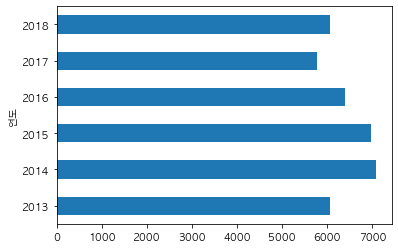

In [61]:
# 시설토마토 면적 그래프
tt[('value', ' 시설토마토:면적 (ha)')].plot.barh()

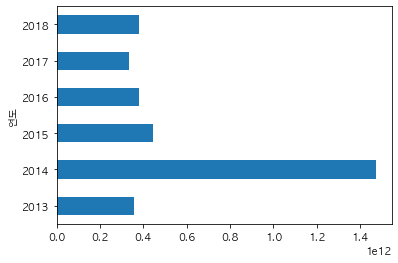

In [62]:
# 총 생산량 그래프
tt[('value',       ' 생산량 (톤)')].plot.barh()

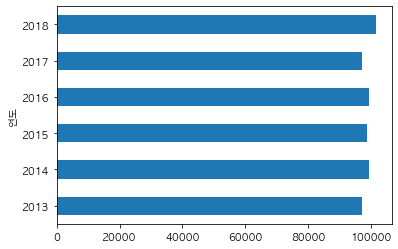

In [63]:
# 면적당 생산량 그래프
tt[('value', ' 10a당 생산량 (kg)')].plot.barh()

### 3) 종관기상관측 전처리

In [9]:
# 빈 리스트 생성하기
list_Data = []

In [10]:
# 컬럼 위치를 변경하기 위해 reColindex 함수 생성
# 
def reColindex(df, ori, fix):
    cols = df.columns.tolist()
    tmp = cols[fix - 1]
    del cols[fix - 1]
    cols.insert(ori - 1, tmp)
    return df[cols]

In [11]:
# 필요없는 컬럼 삭제 / 시간별을 날짜별로 처리 / 그룹화 하여 평균 처리하기 위한 DataModify 함수 생성
def DataModify(list_D):
    if "망" in list_D[len(list_Data) - 1].columns.tolist() :
        list_D[len(list_Data) - 1] = list_D[len(list_Data) - 1].drop(['망'], axis = 1) 
    list_D[-1]["측정일시"] = list_Data[-1]["측정일시"].astype(str).str.slice(start = 0, stop = -2)
    list_D[-1] = list_D[-1].groupby(["지역", "측정소코드", "측정소명", "측정일시"]).mean().reset_index()

In [16]:
# 파일 경로 변수에 저장
str_Root = "/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/"

In [21]:
# 2013년 데이터 전처리

str_File = str_Root + "air/2013년0X분기"
for i in range(4) :
    list_Data.append(pd.read_excel(str_File.replace('X', str(i + 1)) + ".xlsx"))
    list_Data[i] = reColindex(list_Data[i], 3, 2)
    list_Data[i]['PM25'] = np.nan
    list_Data[i] = reColindex(list_Data[i], 11, 10)
    DataModify(list_Data)   
    
print(len(list_Data))
list_Data[len(list_Data) - 1].head()

8


,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10
0,강원 강릉시,632132,옥천동,20131001,0.003000,0.625000,0.027875,0.011542,51.833333
1,강원 강릉시,632132,옥천동,20131002,0.003625,0.645833,0.026625,0.012083,45.166667
2,강원 강릉시,632132,옥천동,20131003,0.004042,0.525000,0.026792,0.008958,20.541667
3,강원 강릉시,632132,옥천동,20131004,0.003958,0.650000,0.025708,0.013875,29.333333
4,강원 강릉시,632132,옥천동,20131005,0.003708,0.595833,0.019542,0.015042,20.666667


In [18]:
# 2014년 데이터 전처리

str_File = str_Root + "air/2014년 X분기"
for i in range(4) :
    list_Data.append(pd.read_csv(str_File.replace('X', str(i + 1)) + ".csv", encoding = 'EUC-KR'))
    DataModify(list_Data)
    
print(len(list_Data))
list_Data[len(list_Data) - 1].head()

4


,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,강원 강릉시,632132,옥천동,20141001,0.002083,0.420833,0.012333,0.012750,32.333333,NaN
1,강원 강릉시,632132,옥천동,20141002,0.001917,0.550000,0.016375,0.015917,42.458333,NaN
2,강원 강릉시,632132,옥천동,20141003,0.001542,0.558333,0.036042,0.007250,28.916667,NaN
3,강원 강릉시,632132,옥천동,20141004,0.001917,0.583333,0.017583,0.014167,31.250000,NaN
4,강원 강릉시,632132,옥천동,20141005,0.001625,0.583333,0.026875,0.007875,24.625000,NaN


In [ ]:
# 2015년 데이터 전처리

str_File = str_Root + 'air/2015년X분기'
for i in range(4) :
    list_Data.append(pd.read_csv(str_File.replace('X', str(i + 1)) + ".csv"))
    DataModify(list_Data)

print(len(list_Data))
list_Data[len(list_Data) - 1].head()

In [ ]:
# 2016년 데이터 전처리

str_File = str_Root + 'air/2016년 X분기'
for i in range(4) :
    list_Data.append(pd.read_csv(str_File.replace('X', str(i + 1)) + ".csv", encoding = 'EUC-KR'))
    DataModify(list_Data)

print(len(list_Data))
list_Data[len(list_Data) - 1].head()

In [ ]:
# 2017년 데이터 전처리

str_File = str_Root + 'air/2017년 X월'
for i in range(12) :
    list_Data.append(pd.read_excel(str_File.replace('X', str(i + 1)) + ".xlsx"))
    DataModify(list_Data)
    
print(len(list_Data))

list_Data[len(list_Data) - 1].head()

In [ ]:
# 2018년 데이터 전처리

str_File = str_Root + 'air/2018년 X분기'
for i in range(4) :
    list_Data.append(pd.read_excel(str_File.replace('X', str(i + 1)) + ".xlsx"))
    DataModify(list_Data)
    
print(len(list_Data))
list_Data[len(list_Data) - 1].head()

In [ ]:
# 2019년 데이터 전처리

str_File = str_Root + 'air/2019년 X월'
for i in range(9) :
    list_Data.append(pd.read_excel(str_File.replace('X', str(i + 1)) + ".xlsx"))
    DataModify(list_Data)
    
print(len(list_Data))
list_Data[len(list_Data) - 1].head()

In [ ]:
# 데이터 병합
df = pd.concat(list_Data)

In [ ]:
# 날짜 데이터 타입 변경
df["측정일시"] = pd.to_datetime(df["측정일시"])
#df.sort_values(by=["측정일시", "지역"], axis=0, ascending = True)

In [ ]:
# csv파일로 저장
df.to_csv("날씨_시계열_데이터.csv", encoding = "CP949", index = False)

In [ ]:
# 데이터 확인
dfTest = pd.read_csv(str_Root + "날씨_시계열_데이터.csv", encoding = "CP949")
dfTest.shape

In [ ]:
dfTest.info()

In [ ]:
# os로 작업 경로 지정
os.chdir('/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/')

In [ ]:
# 저장한 날씨 데이터를 df로 저장
df = pd.read_csv('날씨_시계열_데이터.csv',encoding='euc-kr')

In [ ]:
# 측정일시 컬럼의 연월일을 연도, 월일로 나누기
df['연도'] = df['측정일시'].str.split("-").str.get(0)
df['날짜'] = df['측정일시'].str.split("-").str.get(1) + "-" + df['측정일시'].str.split("-").str.get(2)

# 문자형이 아니라 날짜형 데이터를 Split 하는 방법
#df['연도'] = df["측정일시"].dt.strftime('%Y_%m%d').str.split('_').str[0]
#df['월일'] = df["측정일시"].dt.strftime('%Y_%m%d').str.split('_').str[1]

In [ ]:
df.columns

In [ ]:
# 사용할 컬럼
df[['지점명', '일시', '평균기온(°C)', '일강수량(mm)', '합계 일조시간(hr)', '평균 전운량(1/10)']]


### 4) 데이터 합치기

#### 기상데이터와 토마토 생산량

#### 기상데이터와 토마토 가격

#### 토마토 생산량과 토마토 가격

## 4. 머신러닝 모델 적용

### 1) 시계열?

#### 기상데이터와 토마토 가격

#### 토마토 생산량과 토마토 가격

### 2) 랜덤포레스트